# UCDSML Lecture 12 Part 5

## Neural Networks (MLP)

## Prof. James Sharpnack

In [2]:
# This was modified from Tensorflow tutorial: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
# All appropriate copywrites are retained, use of this material is guided by fair use for teaching
# Some modifications made for course STA 208 by James Sharpnack jsharpna@gmail.com

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [20]:
tf.keras.backend.set_floatx('float64')

### Importing and installing tensorflow

- install tensorflow 2.0 with conda (you do not need to install tensorflow-gpu for the course)
- tensorflow, build and execute computational graphs
- tensorflow 1.0 and 2.0 differ mainly by making eager execution default, removing sessions

In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.0.0
Eager execution: True


### Loading data

- tensorflow has many built in utilities for getting data
- you could just as easily use requests/pandas

In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/jsharpna/.keras/datasets/iris_training.csv


In [5]:
train_df = pd.read_csv(train_dataset_fp)
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values[:,:-1],train_df.values[:,-1]))

### Tensorflow datasets API

- Datasets API loads and readies data for use in stochastic gradient descent type iteration
- the batch size tells it how many samples for the mini-batch
- Dataset has methods to shuffle the data and apply transformations 

In [6]:
batch_size = 32

train_dataset = train_dataset.shuffle(1000)
train_dataset = train_dataset.batch(batch_size)
## sets batchsize and shuffles

In [7]:
X,y = next(iter(train_dataset))
X

<tf.Tensor: id=18, shape=(32, 4), dtype=float64, numpy=
array([[4.9, 3.1, 1.5, 0.1],
       [4.7, 3.2, 1.3, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.2, 3.5, 1.5, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 3.1, 5.5, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 3.1, 1.5, 0.1],
       [7.3, 2.9, 6.3, 1.8],
       [4.5, 2.3, 1.3, 0.3],
       [6. , 2.2, 5. , 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [6.5, 2.8, 4.6, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [5. , 3.5, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [6.6, 2.9, 4.6, 1.3],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [7.2, 3.6, 6.1, 2.5],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.8, 5.1, 2.4],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 3. , 6.1, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 4.9, 1.5]])>

### Adding Layers to Keras Model

- keras model can include more layers
- simplest way is with tf.keras.Sequential
- can make custom layers (beyond scope of class)

In [8]:
train_dataset.element_spec

(TensorSpec(shape=(None, 4), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [21]:
lin_layers = tf.keras.layers.Dense(3)
lin_layers(X)
## Builds and calls the layer

<tf.Tensor: id=166, shape=(32, 3), dtype=float64, numpy=
array([[-4.13603531,  5.61812939, -0.35863727],
       [-4.15256011,  5.61023463, -0.72352937],
       [-3.70146869,  5.04676745, -0.45831141],
       [-2.05300635,  3.79330706,  1.17900682],
       [-4.86133404,  6.63416179, -0.76344418],
       [-4.54358635,  6.14215207, -0.69726887],
       [-1.68065751,  3.29526604,  1.15673546],
       [-2.19731578,  4.15434249,  1.13739789],
       [-1.50927509,  3.4484236 ,  1.81972331],
       [-2.2076328 ,  3.8942245 ,  0.50270758],
       [-4.13603531,  5.61812939, -0.35863727],
       [-1.36561267,  3.55645362,  2.78059584],
       [-3.23362131,  4.73737527, -0.20640484],
       [-1.04986264,  2.91013361,  2.23640623],
       [-1.53329924,  3.55027807,  1.38182515],
       [-2.00866481,  4.08869002,  1.51555449],
       [-2.20991981,  3.9321761 ,  1.51933253],
       [-4.47719948,  6.06209972, -0.99182994],
       [-4.93447817,  6.67788908, -1.3187521 ],
       [-2.28786121,  4.3324297

In [10]:
lin_layers.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.7888142 ,  0.11500525, -0.2073543 ],
        [-0.6522186 , -0.20596325,  0.30536735],
        [-0.346636  ,  0.7057624 ,  0.05973095],
        [-0.5339098 ,  0.86396885, -0.21265304]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [11]:
lin_layers.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.7888142 ,  0.11500525, -0.2073543 ],
        [-0.6522186 , -0.20596325,  0.30536735],
        [-0.346636  ,  0.7057624 ,  0.05973095],
        [-0.5339098 ,  0.86396885, -0.21265304]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [12]:
## previous model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3),  
])

In [22]:
## model is callable outputs decision function
logits = model(X)
logits[:5]

<tf.Tensor: id=180, shape=(5, 3), dtype=float32, numpy=
array([[-2.0258932, -1.6479504, -5.6755395],
       [-2.013244 , -1.5127838, -5.553973 ],
       [-1.8312147, -1.5504974, -5.2540092],
       [-1.0016645, -3.4782426, -8.002915 ],
       [-2.416422 , -1.9505339, -6.783106 ]], dtype=float32)>

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [18]:
## new model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation="relu"),  
  tf.keras.layers.Dense(3)
])

In [23]:
logits = model(X)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  50        
_________________________________________________________________
dense_3 (Dense)              multiple                  33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [45]:
## Create the losses
logistic_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

logistic_loss(y,logits)

<tf.Tensor: id=72144, shape=(), dtype=float32, numpy=0.97770584>

In [46]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=training)

  return logistic_loss(y,logits)


l = loss(model, X, y, training=False)
print("Loss test: {}".format(l))

Loss test: 0.9777058362960815


In [47]:
## Gradient tape lets TF know with respect to what to take gradients
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [48]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [49]:
loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True).numpy()))

Step: 0, Initial Loss: 0.9777058362960815
Step: 1,         Loss: 0.9147542715072632


In [50]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.881, Accuracy: 70.000%
Epoch 050: Loss: 0.348, Accuracy: 97.500%
Epoch 100: Loss: 0.260, Accuracy: 97.500%
Epoch 150: Loss: 0.202, Accuracy: 97.500%
Epoch 200: Loss: 0.173, Accuracy: 97.500%


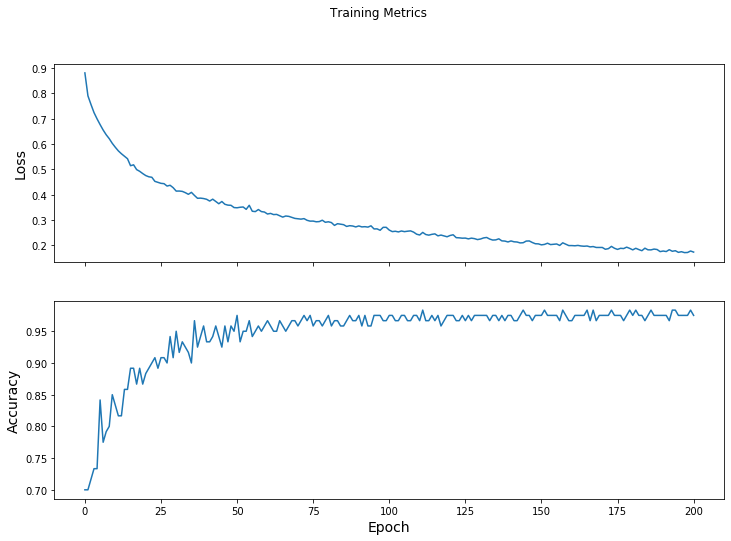

In [51]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [52]:
## Evaluate on test set

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [53]:
test_df = pd.read_csv(test_fp)
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values[:,:-1],test_df.values[:,-1]))
test_dataset = test_dataset.batch(batch_size)

In [54]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in train_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.500%


In [24]:
## new model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(6,activation="relu"), 
  tf.keras.layers.Dense(6,activation="relu"), 
  tf.keras.layers.Dense(3)
])

In [25]:
logits = model(X)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  30        
_________________________________________________________________
dense_6 (Dense)              multiple                  42        
_________________________________________________________________
dense_7 (Dense)              multiple                  21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [43]:
## Note: Rerunning this cell uses the same model variables

## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.Adam()

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 40

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.091, Accuracy: 97.500%


In [45]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in train_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.500%
